In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import wandb
import pandas as pd
import statsmodels.graphics.tsaplots
api = wandb.Api()
print(os.getcwd())
wandb_id = 'r0v8x13s'
wandb_project = 'the_patpat/LibMTL-examples_multi_mnist'

/home/pasch/repos/LibMTL/LibMTL


In [2]:
wandb_ids = [run.id for run in api.runs(wandb_project)]

In [3]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [4]:
def load_run(wandb_id):
    data = np.load(f'../examples/multi_mnist/gradients_{wandb_id}.npz')
    run = api.run(f'{wandb_project}/{wandb_id}')
    run_hist = run.history()
    name = run.name
    gradients = data['arr_0']
    return name, run_hist, gradients

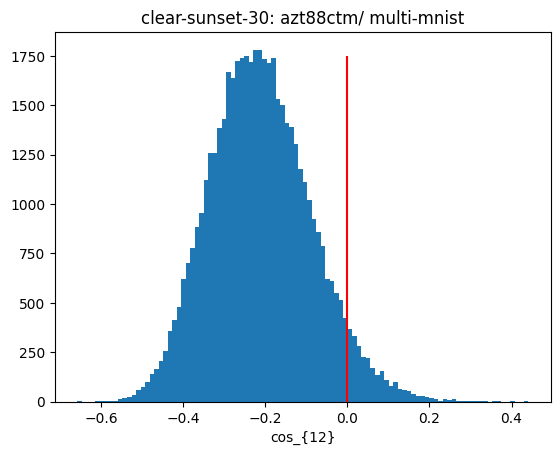

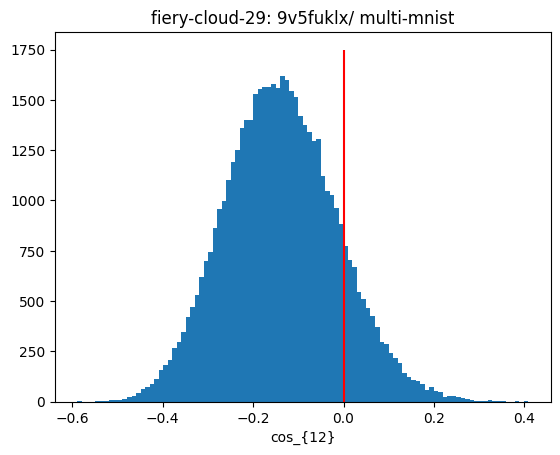

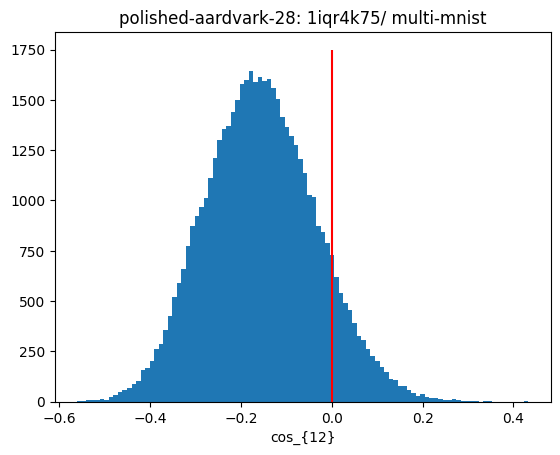

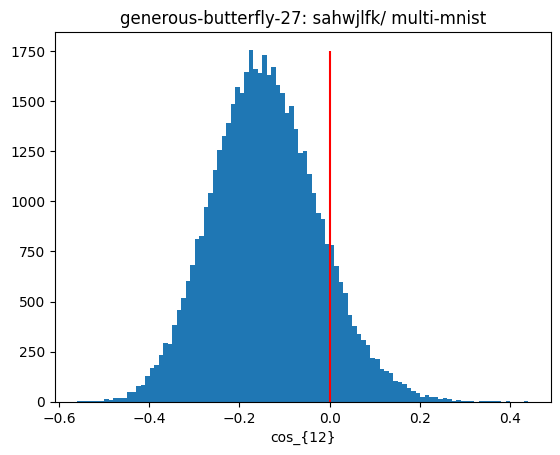

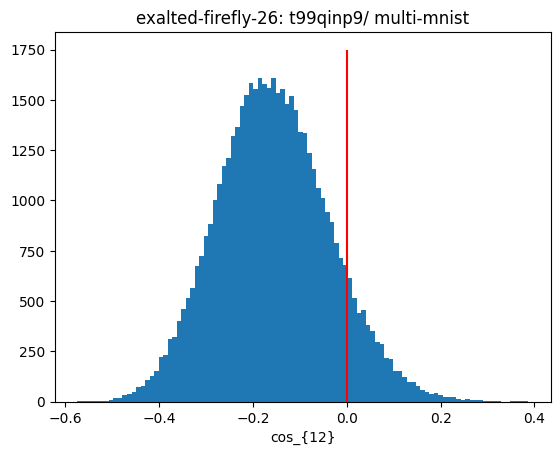

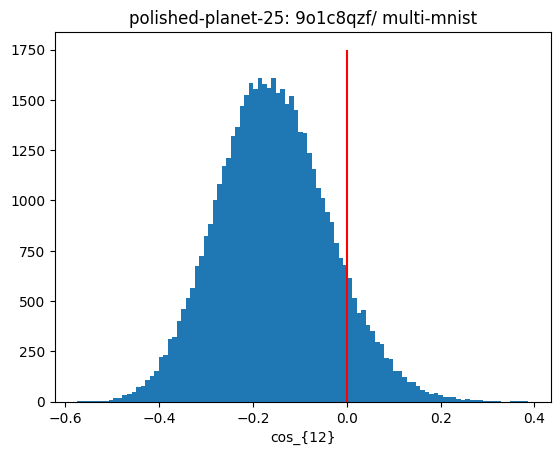

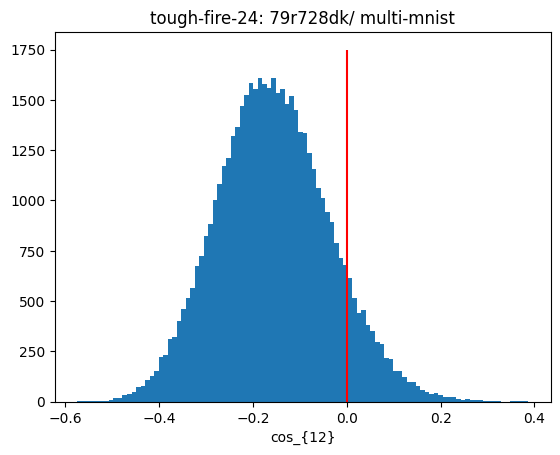

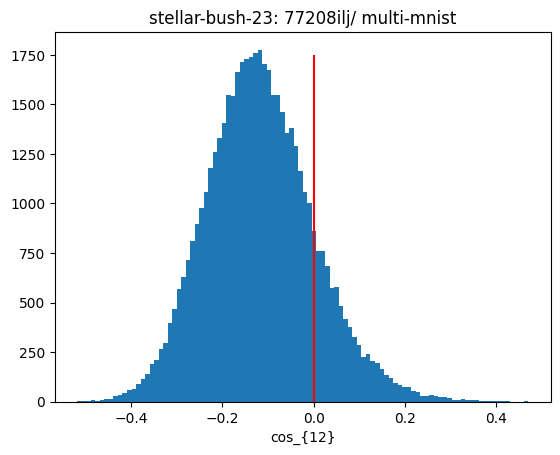

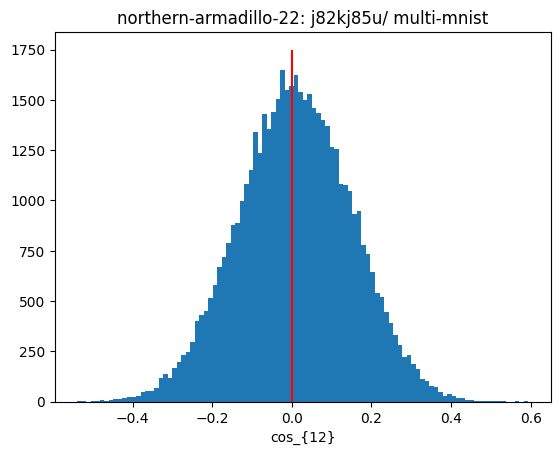

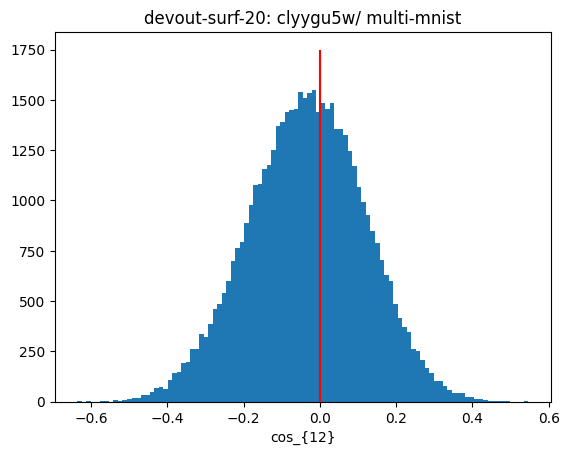

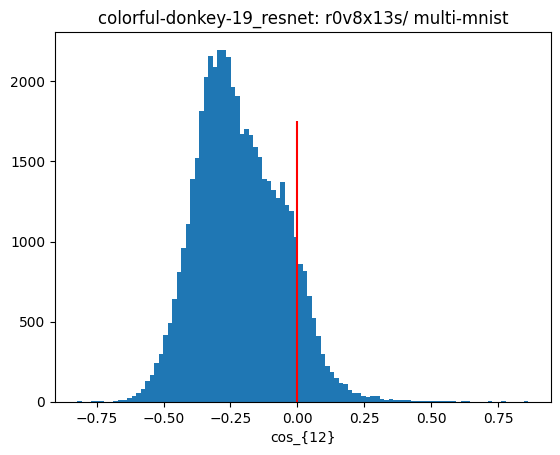

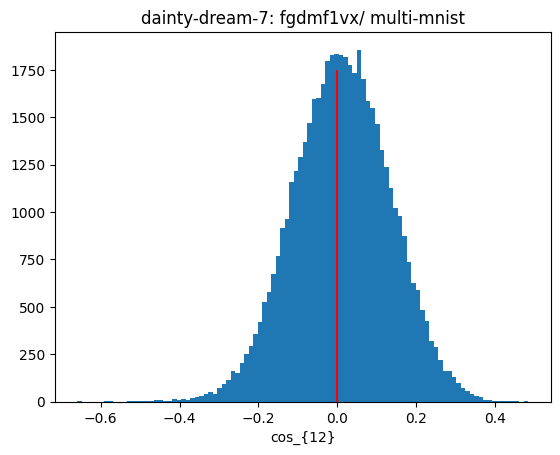

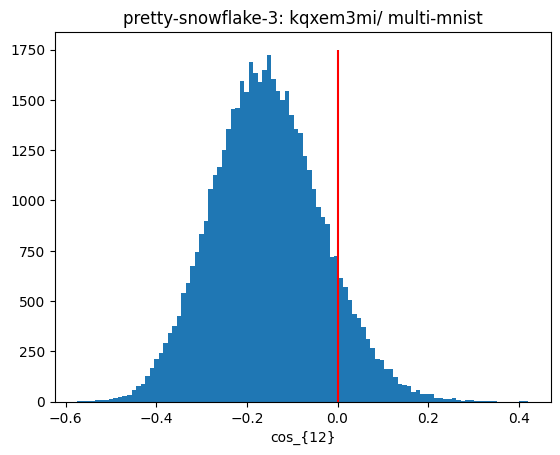

In [28]:
for wandb_id in wandb_ids:
    try:
        name, run, gradients = load_run(wandb_id)
        plt.figure()
        plt.hist(gradients[:, :, 0, 1].flatten(), bins=100)
        plt.title(f'{name}: {wandb_id}/ multi-mnist')
        plt.xlabel('cos_{12}')
        plt.vlines([0.0], [0], [1750], 'r')
    except FileNotFoundError:
        print(f'gradient file for {wandb_id} not found')

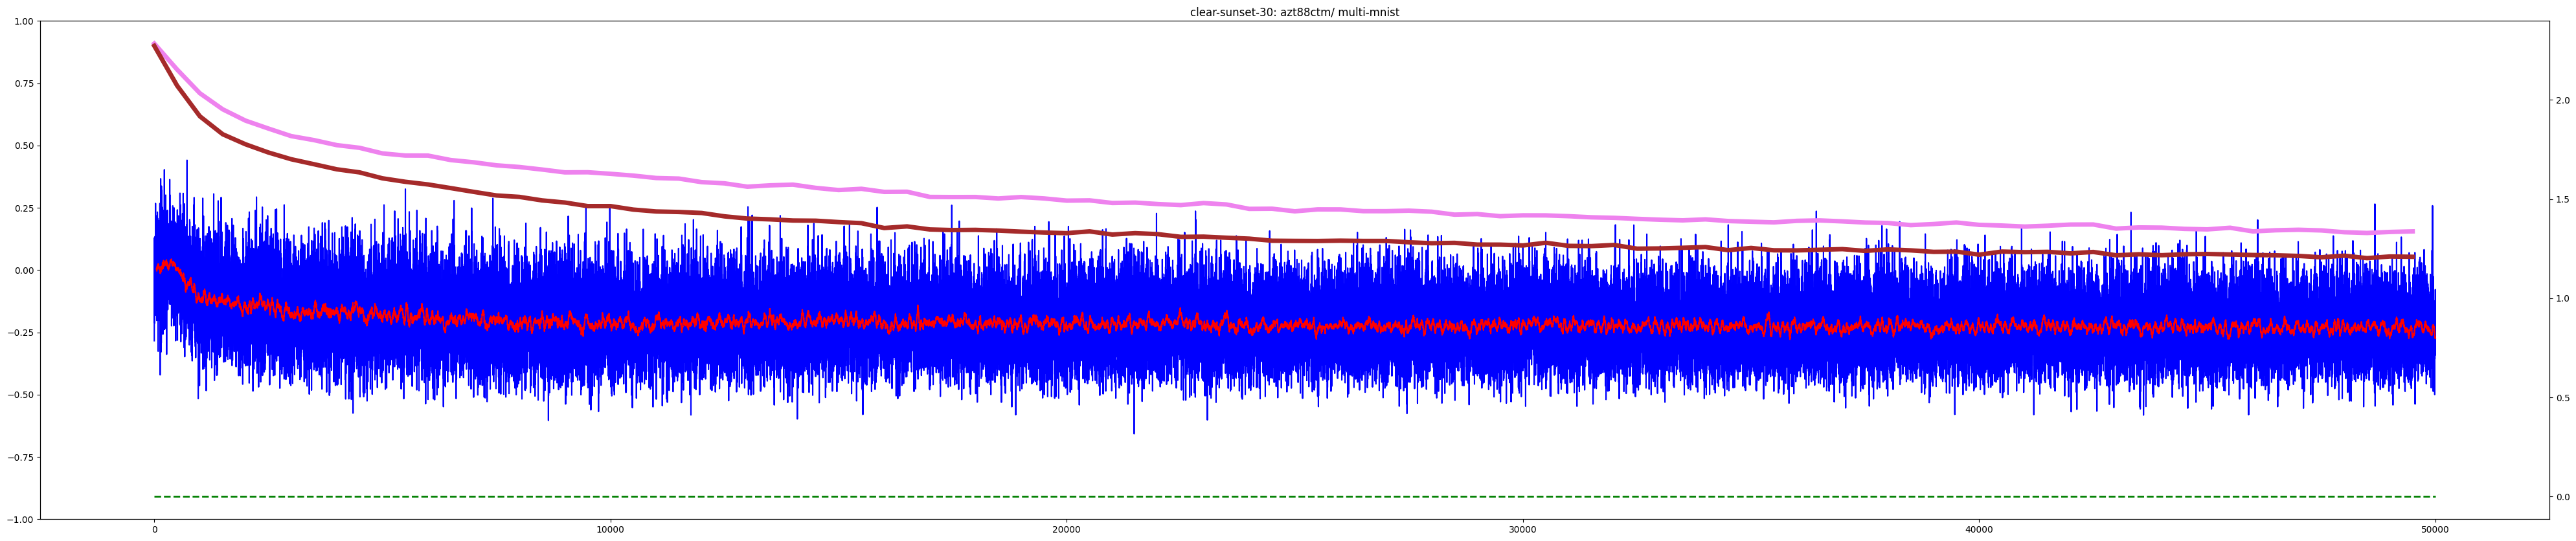

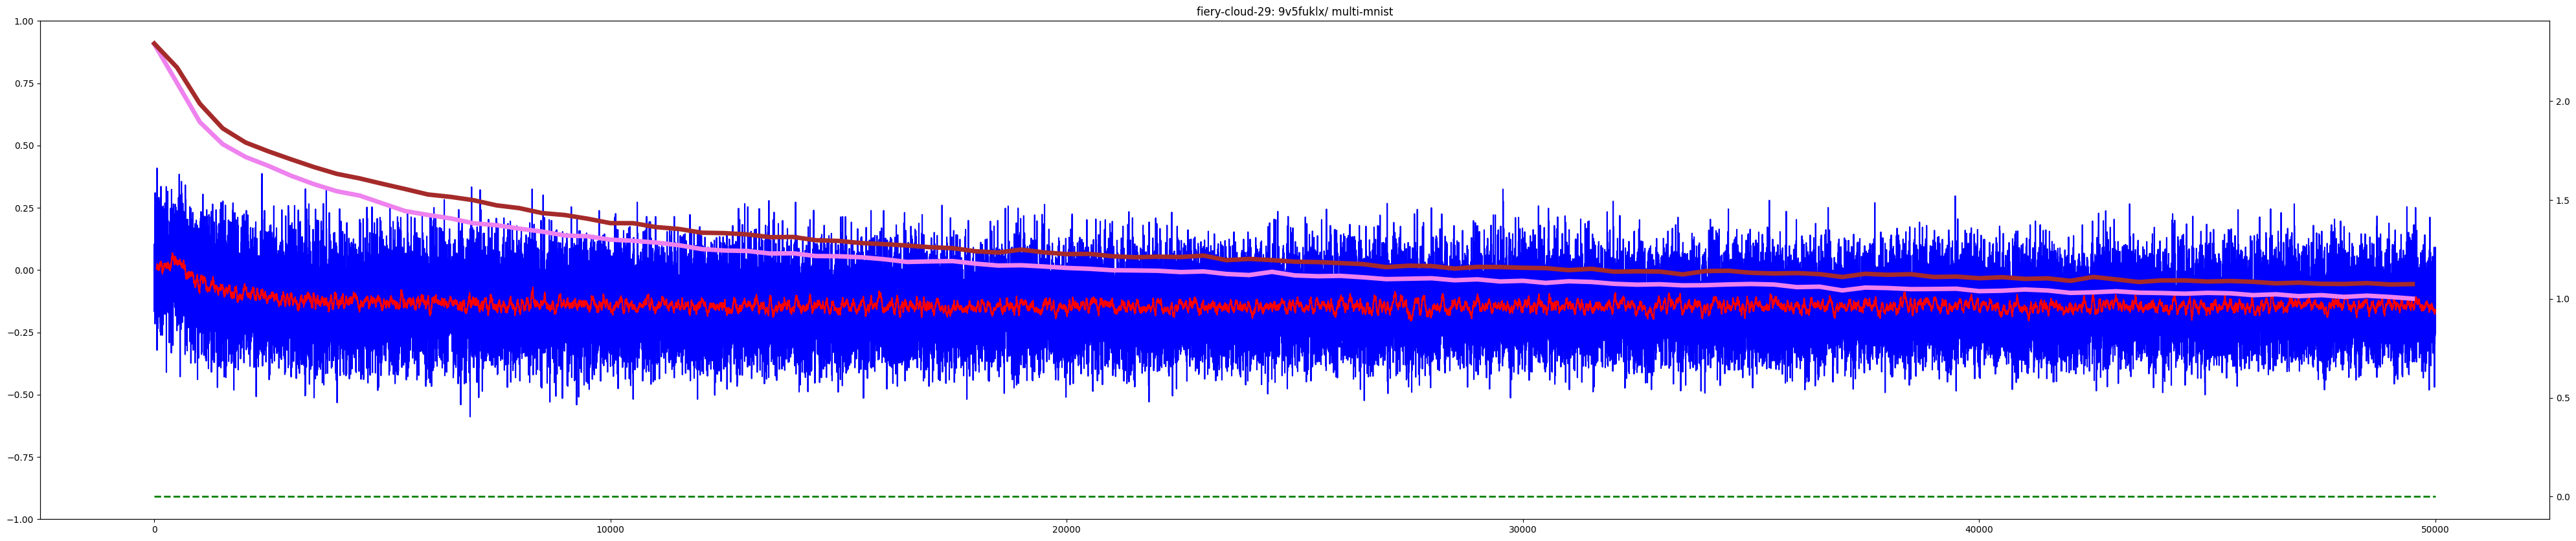

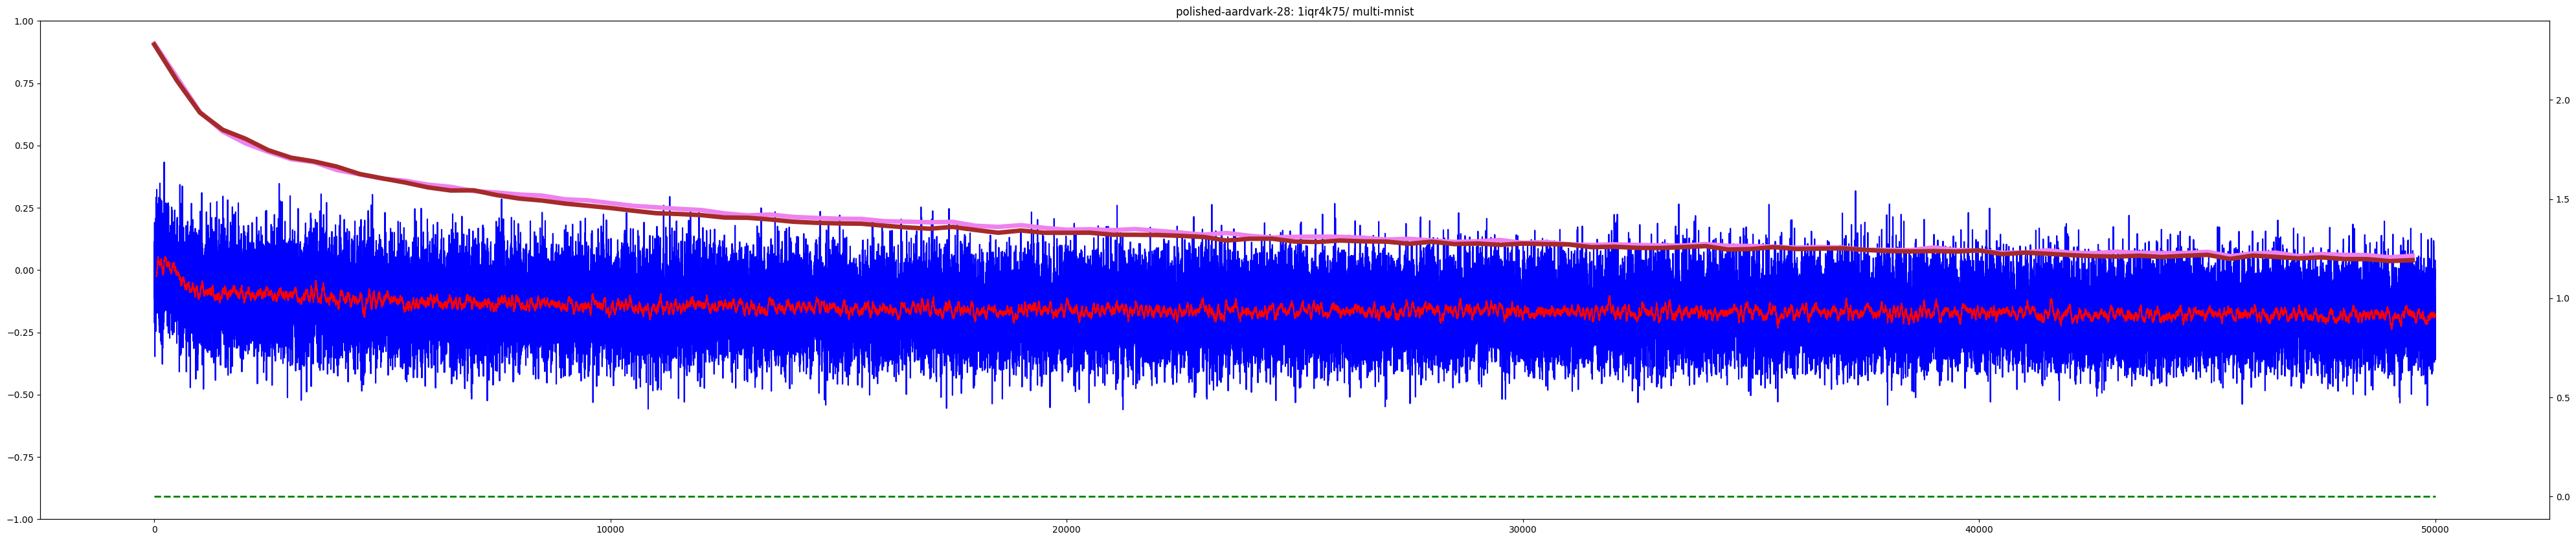

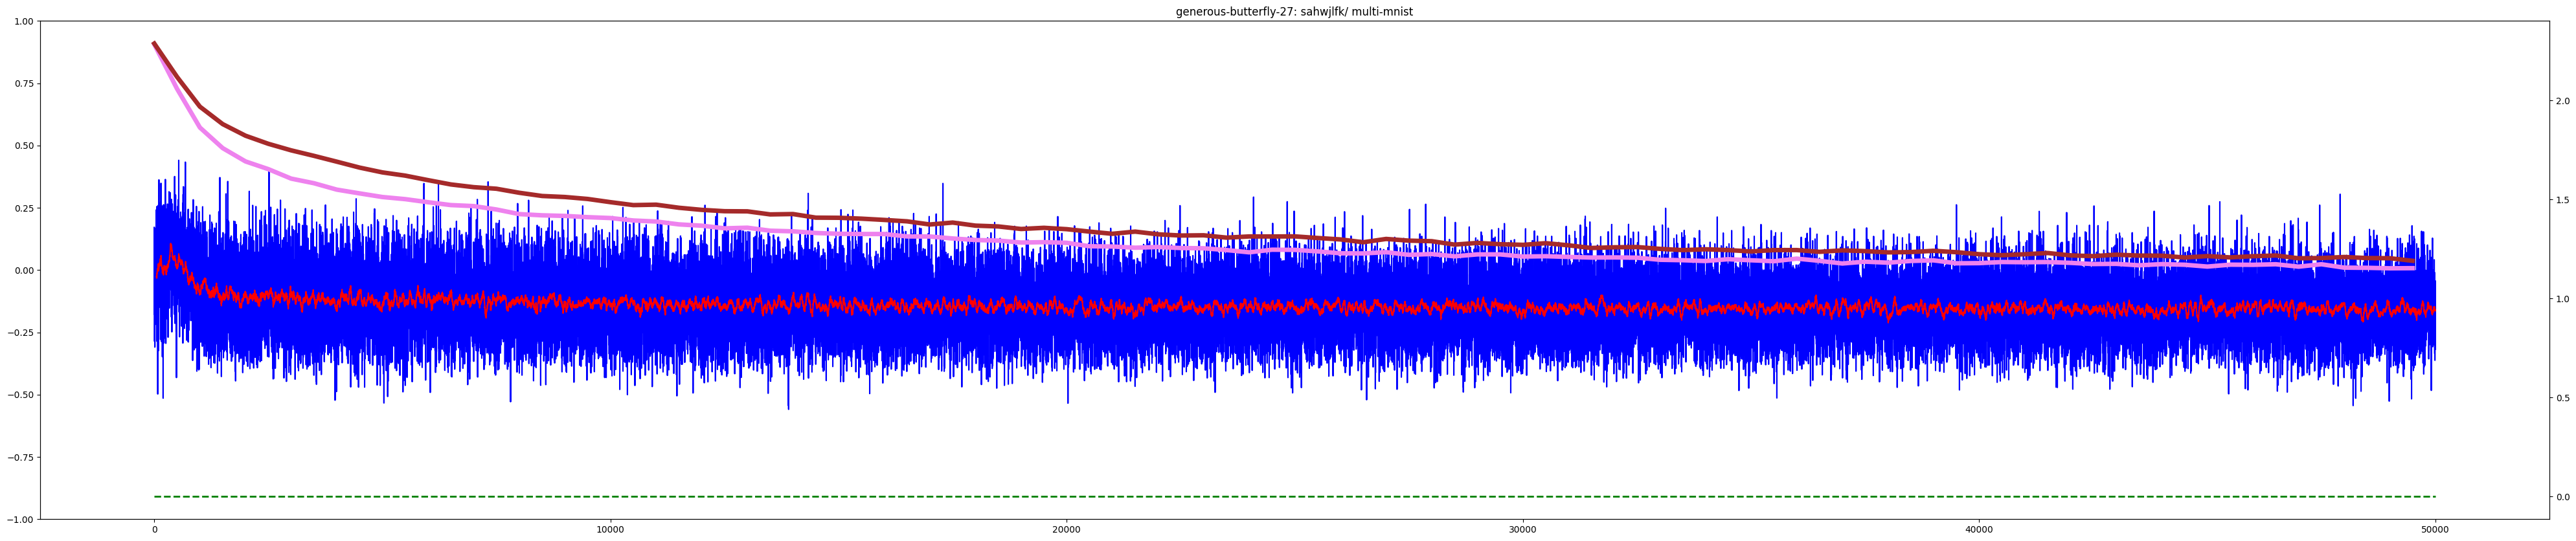

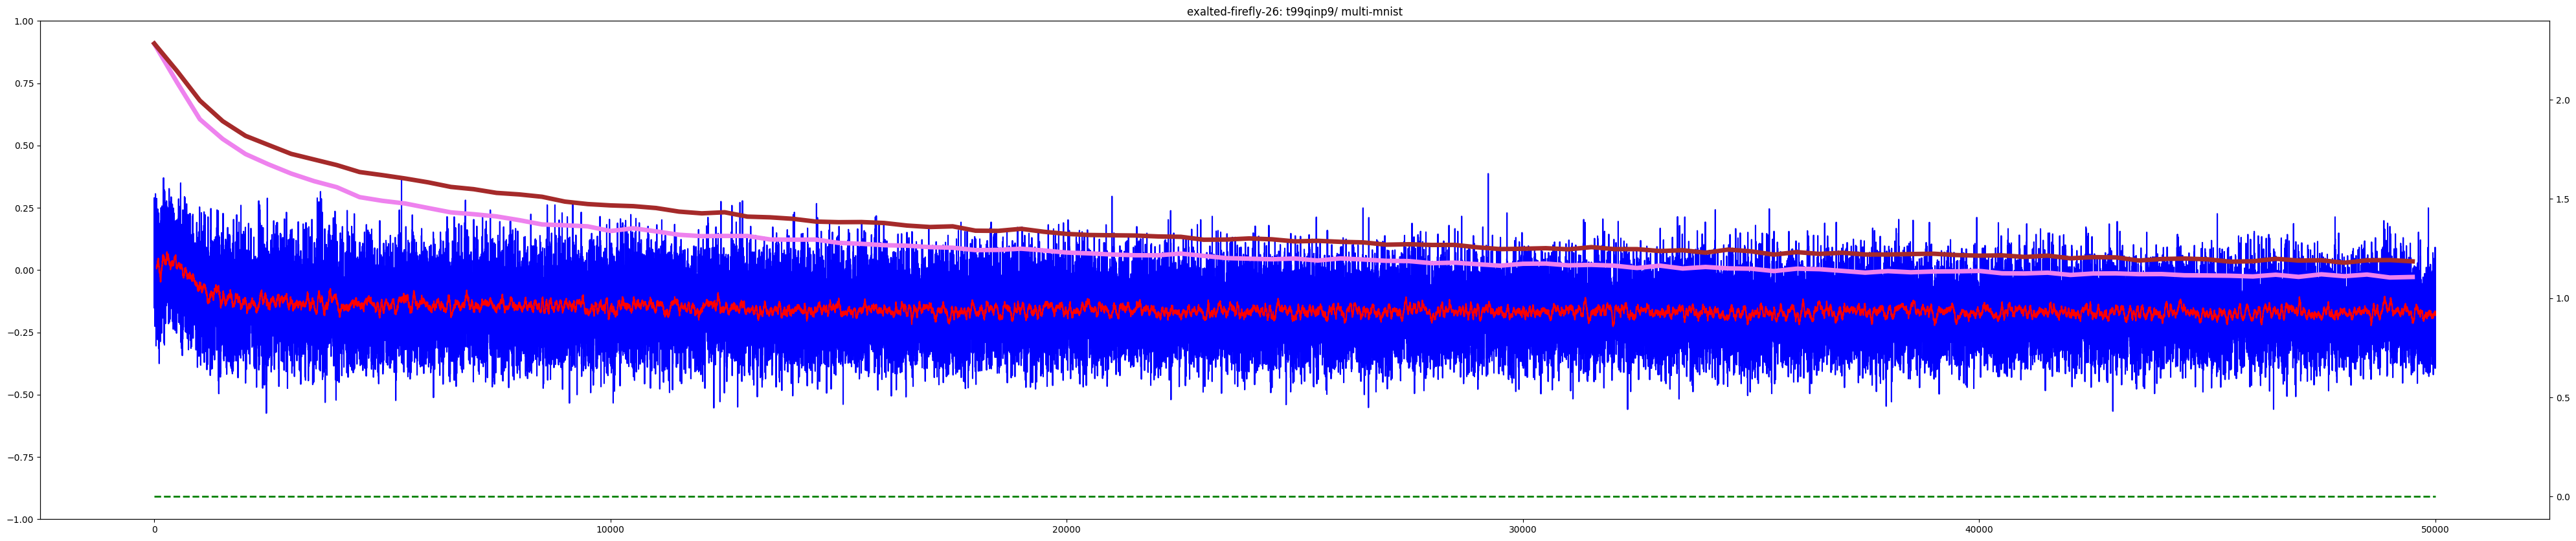

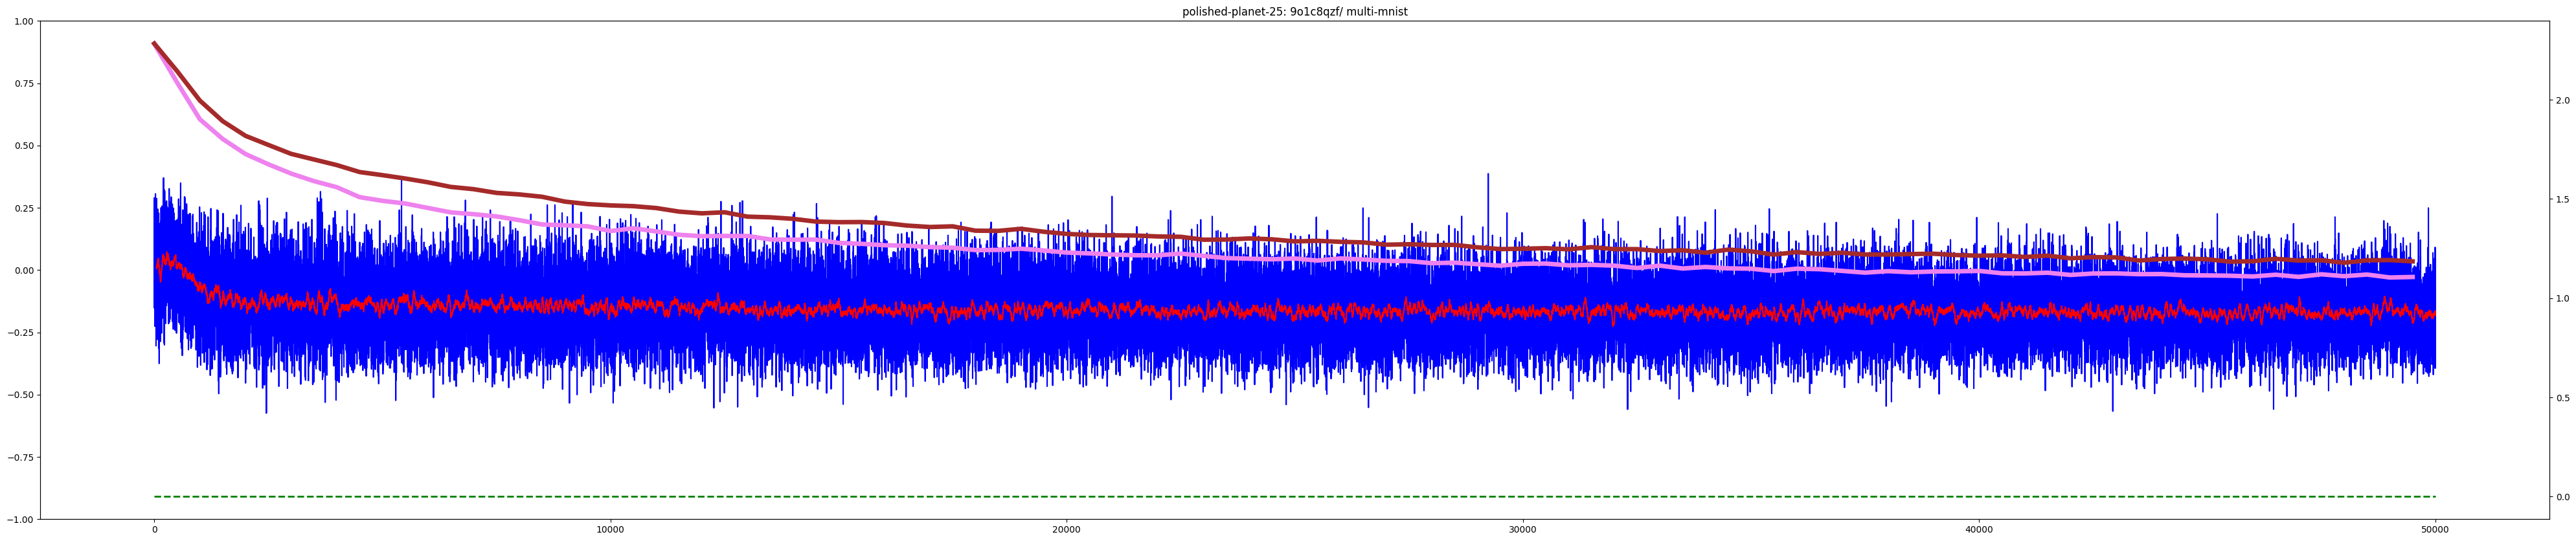

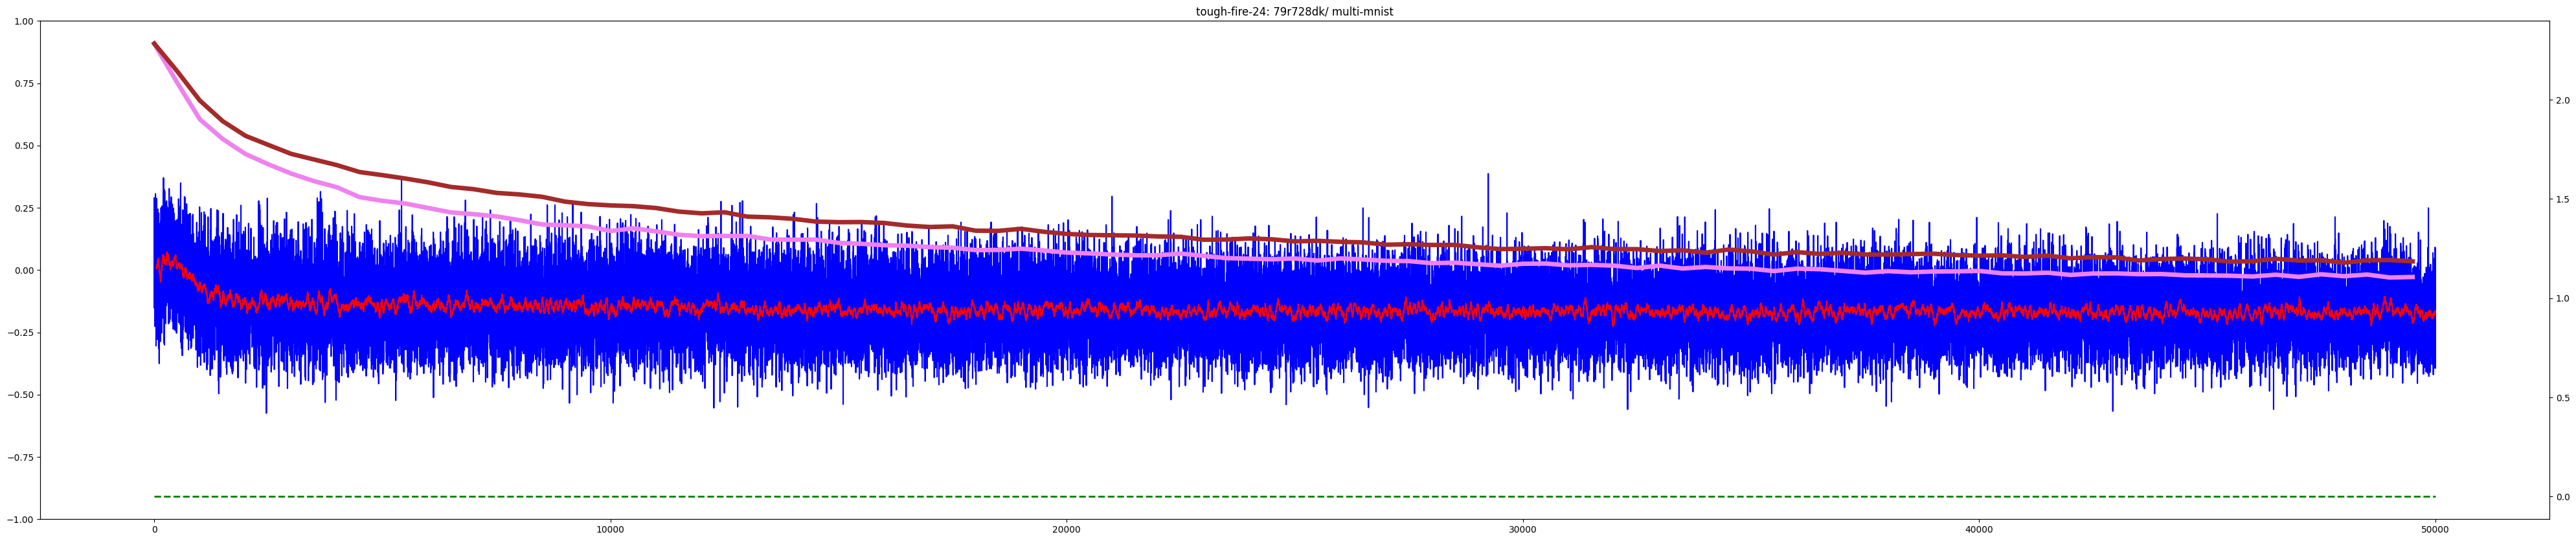

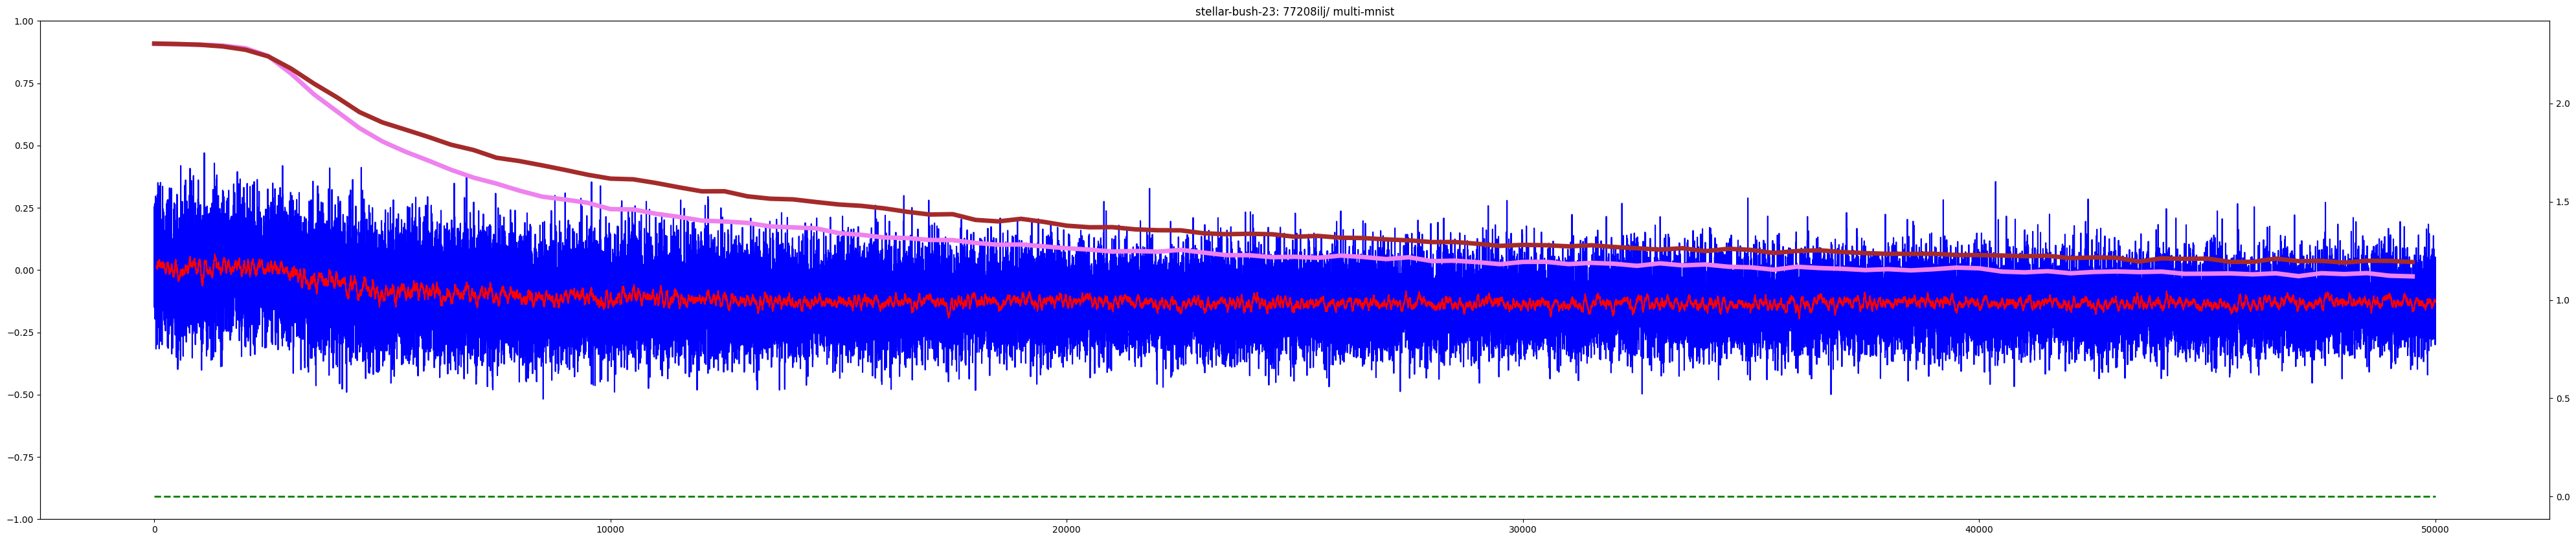

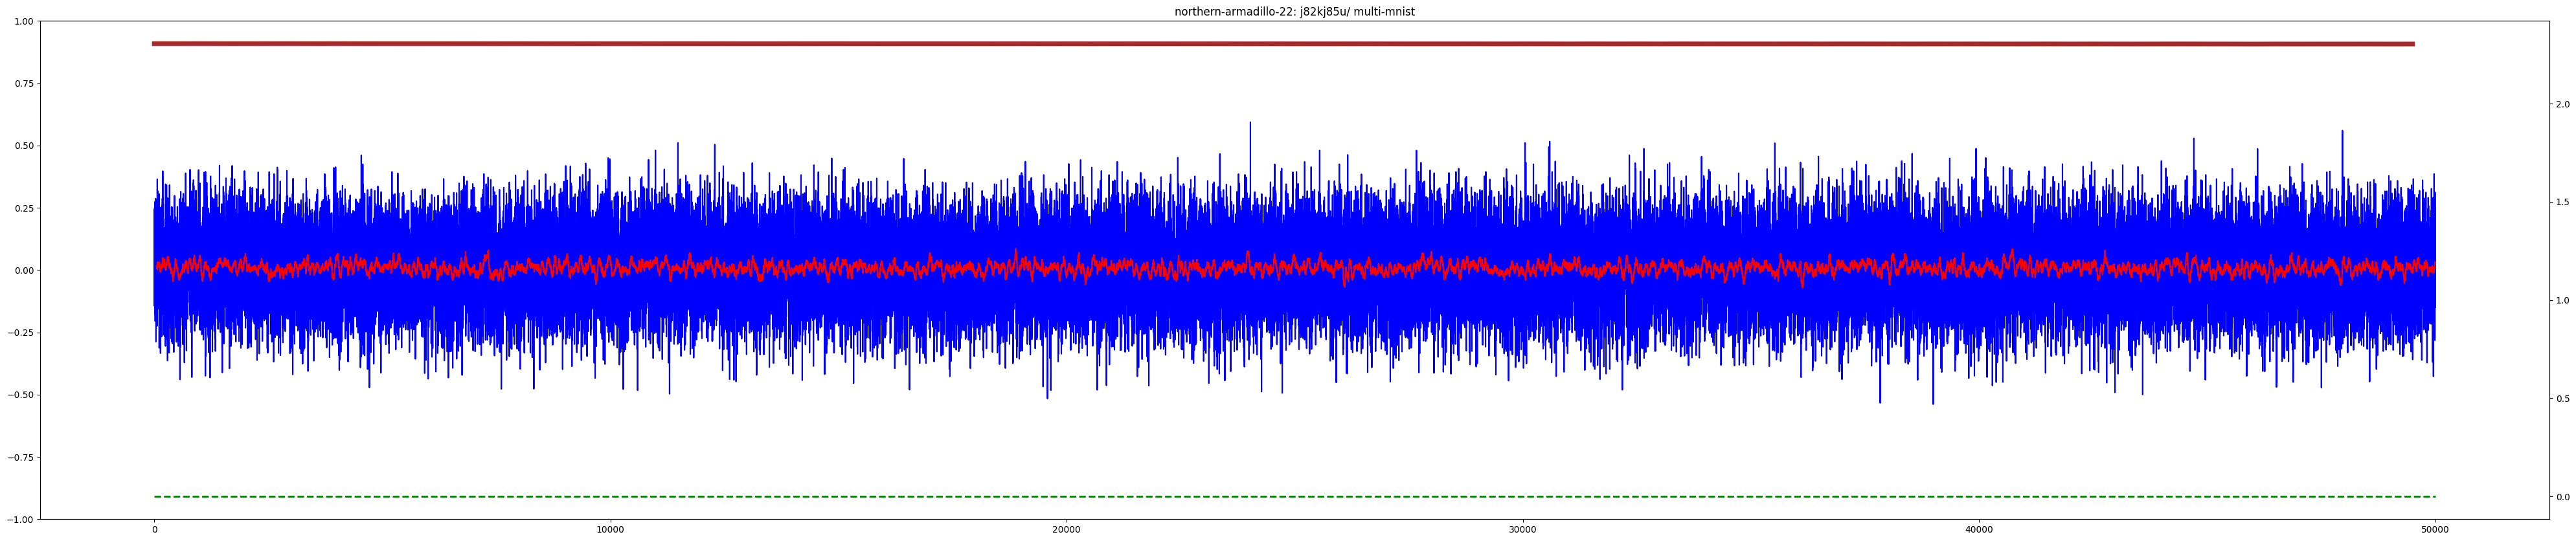

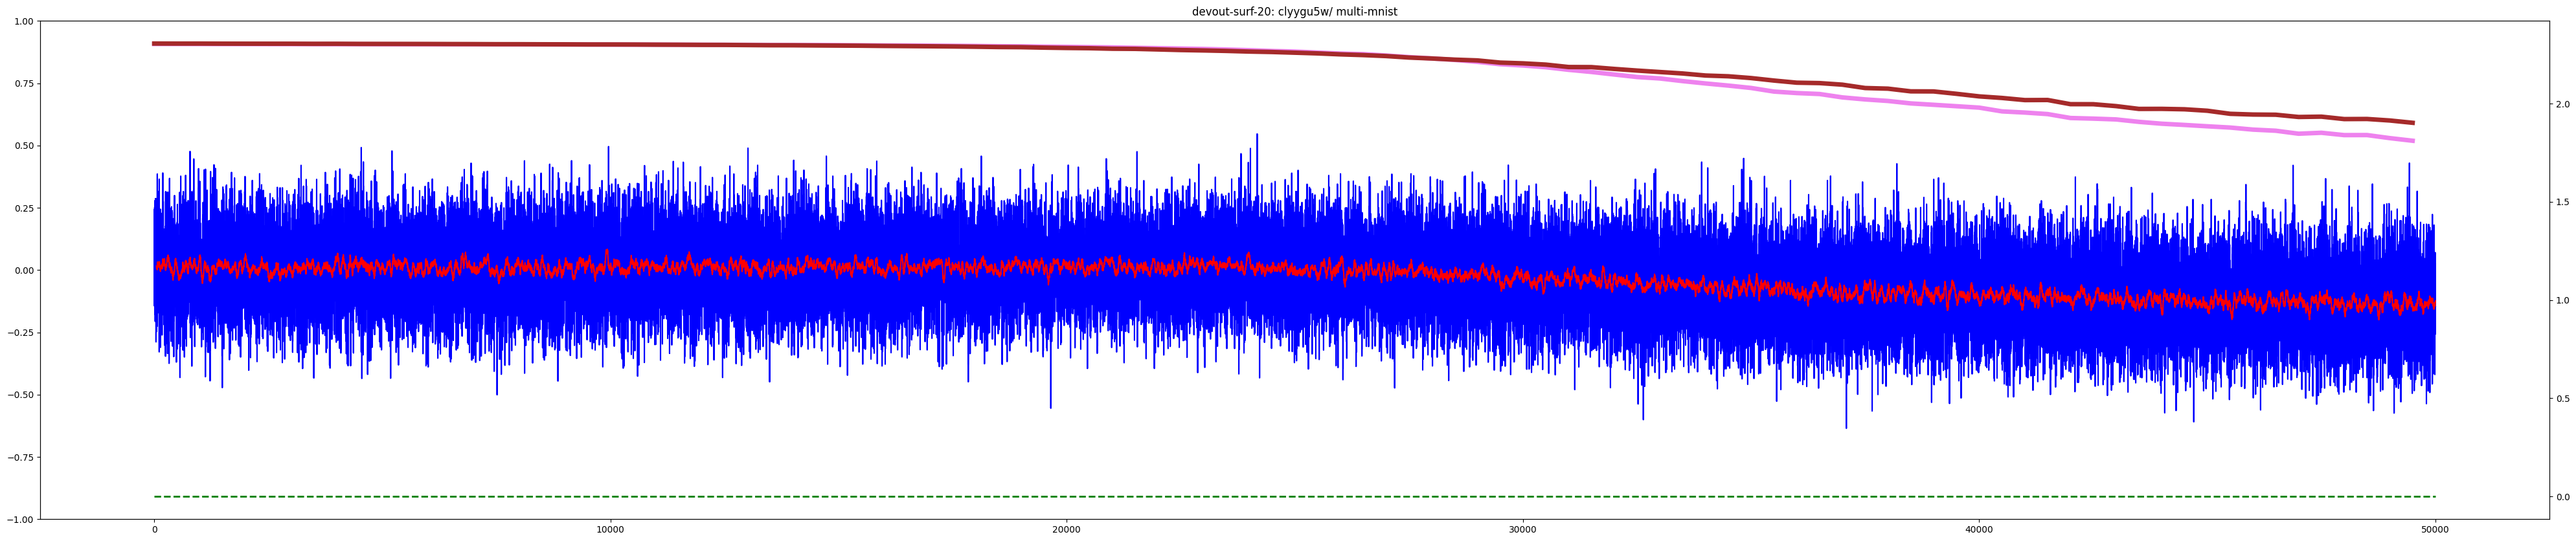

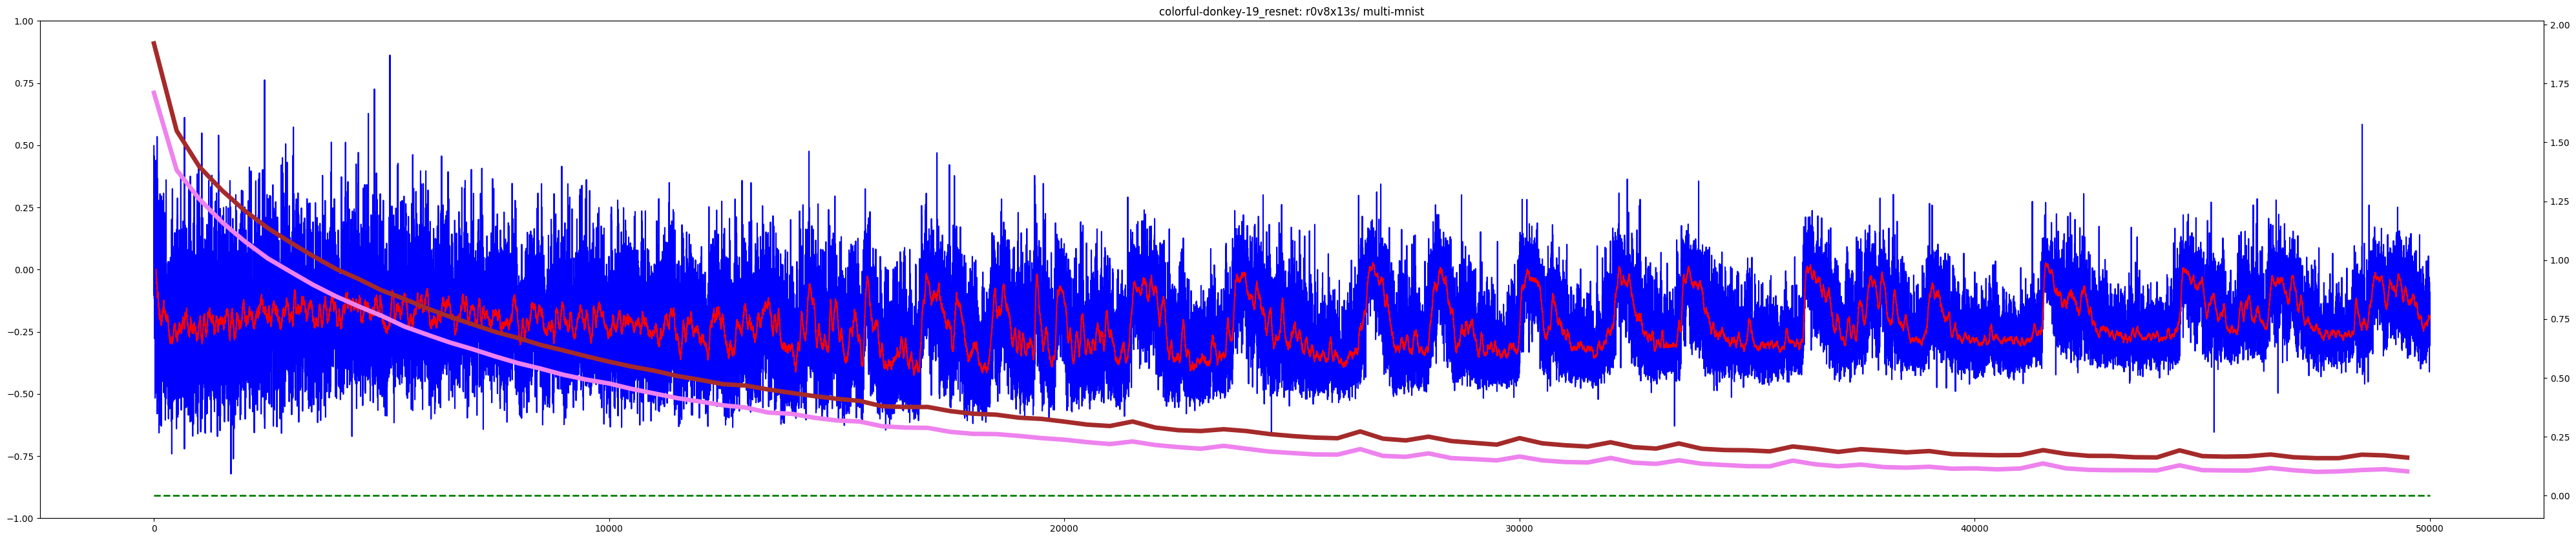

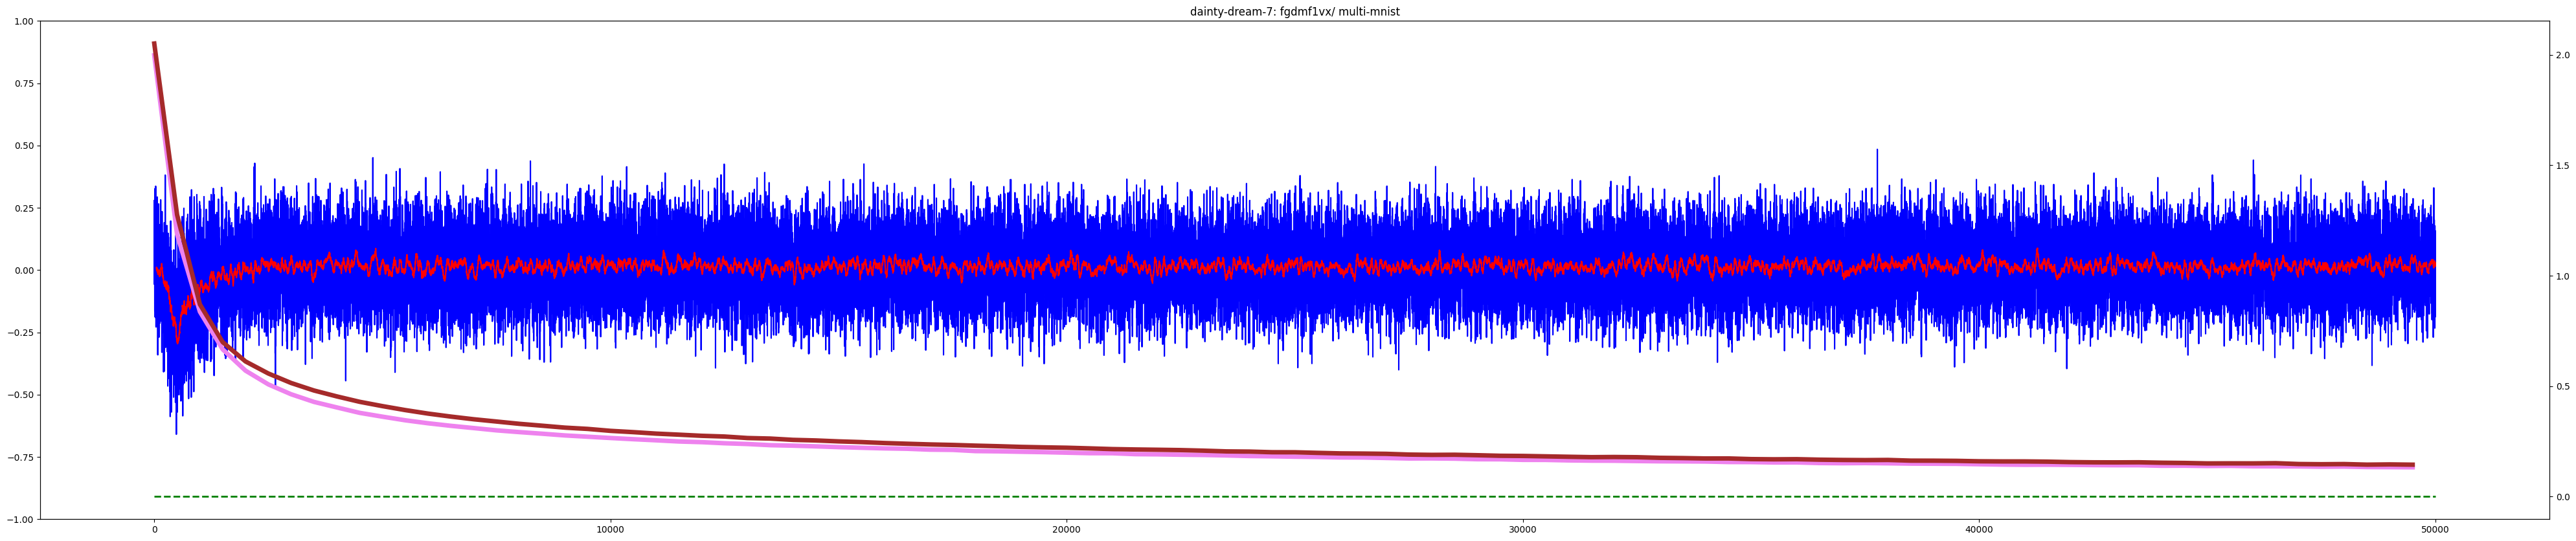

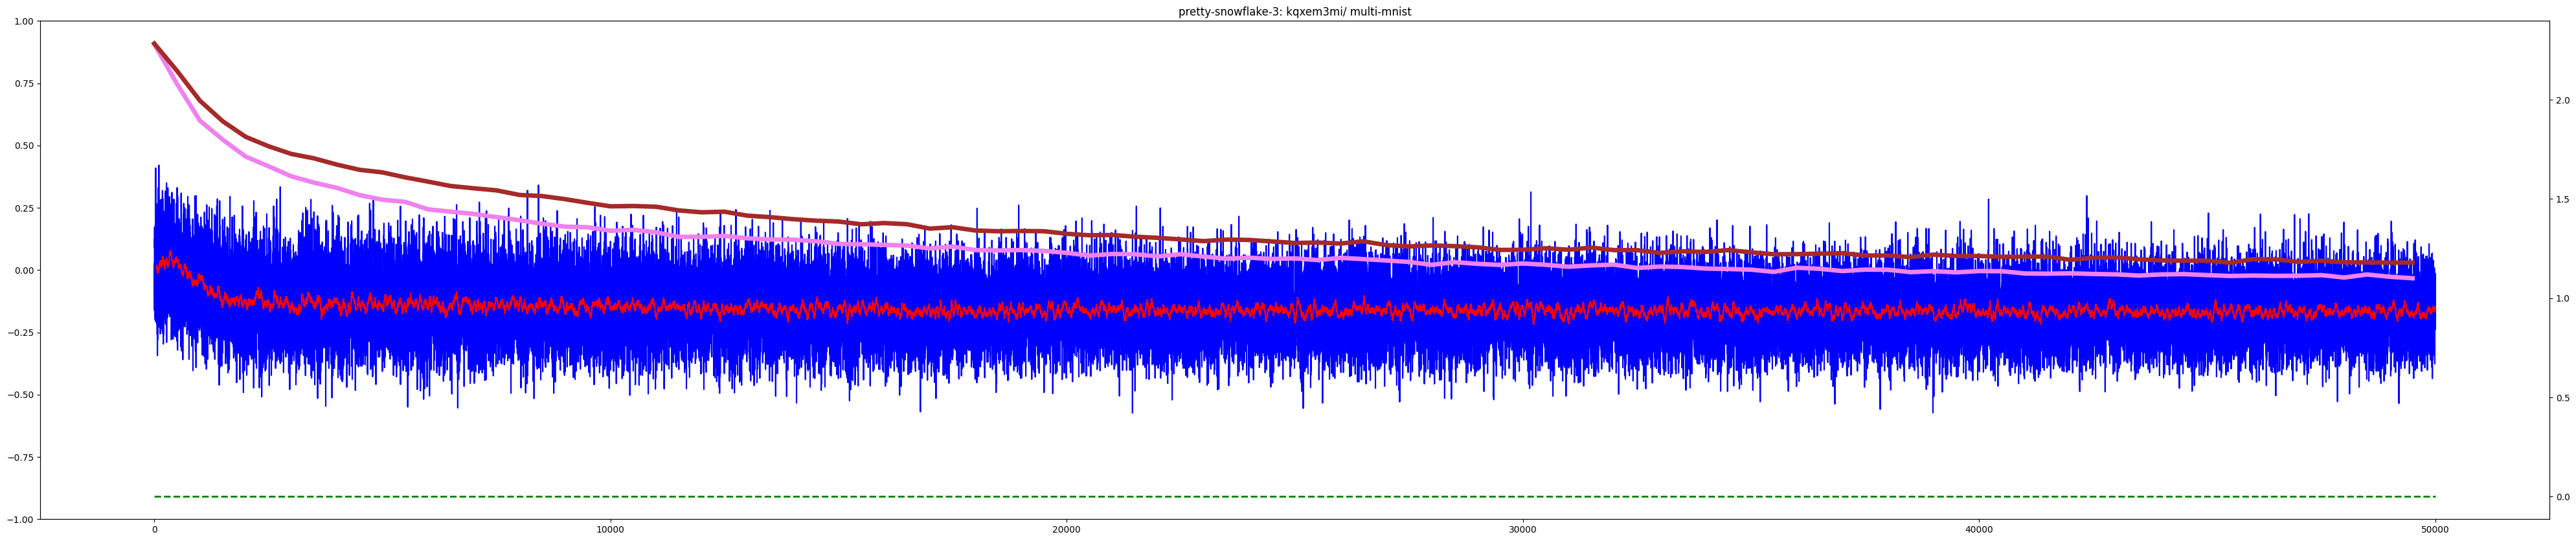

In [79]:
for wandb_id in wandb_ids:
    name, run_hist, gradients = load_run(wandb_id)
    plt.figure(figsize=(50,10))
    plt.title(f'{name}: {wandb_id}/ multi-mnist')
    plt.plot(gradients[:, :, 0, 1].flatten(), 'b')
    plt.ylim(-1,1)
    # plt.plot(moving_average(gradients[:, :, 0, 1].flatten(), 50), 'r')
    pd.Series(gradients[:, :, 0,1].flatten()).rolling(50).mean().plot(color='r')
    # pd.Series(gradients[:, :, 0,1].flatten()).rolling(50).mean().diff().plot(color='r')
# plt.plot(pd.Series(gradients[:, :, 0,1].flatten()).diff())
    # plt.hlines(0, 0, 50000, 'g', '--', linewidth=10)
    plt.twinx()
    plt.plot(np.arange(0,50000, 50000/100), run_hist['losses.train.L'].dropna(), color='violet', linewidth=5)
    plt.plot(np.arange(0,50000, 50000/100), run_hist['losses.train.R'].dropna(), color='brown', linewidth=5)
    # plt.ylim(-1, 1)
    plt.hlines(0, 0, 50000, 'g', '--', linewidth=2)

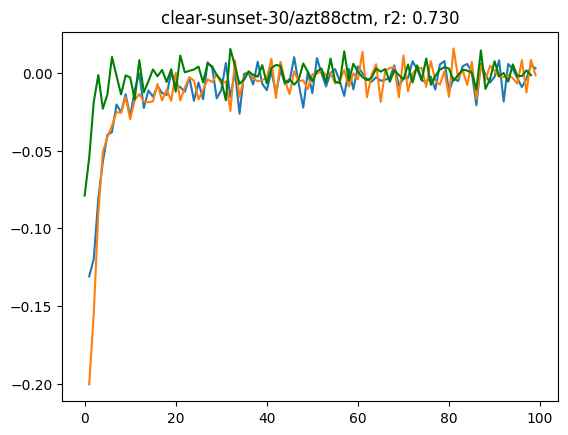

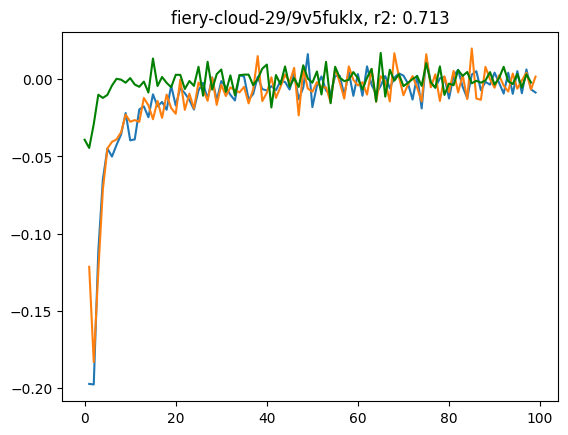

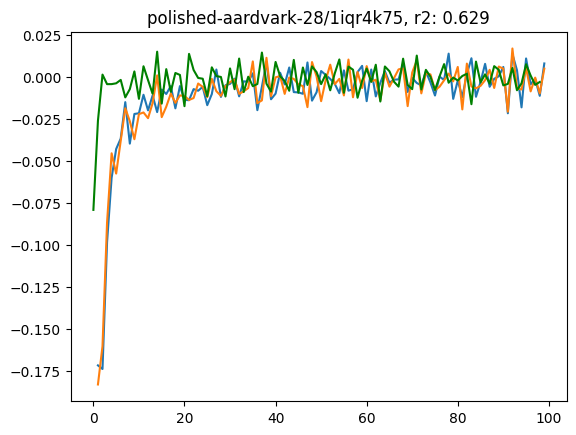

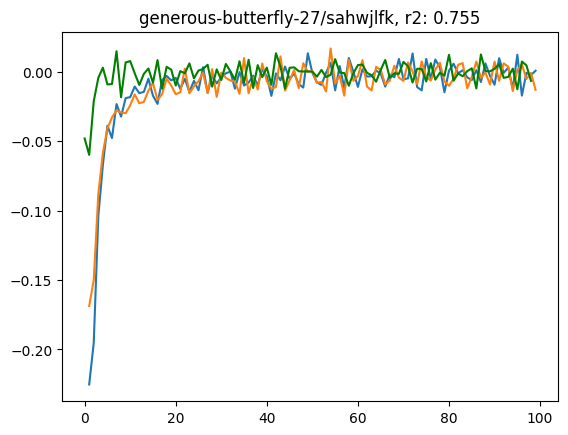

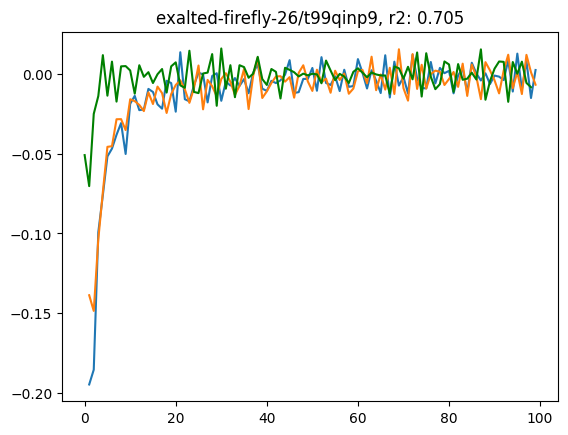

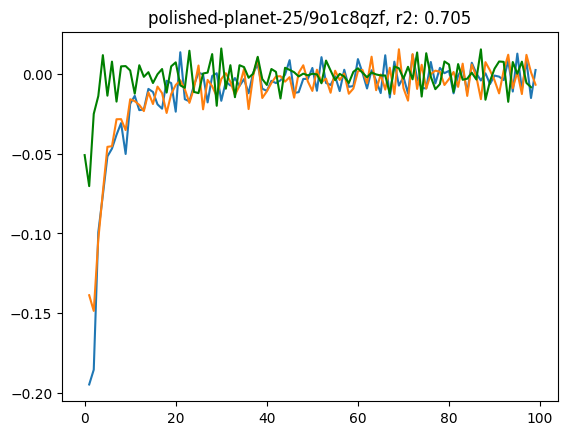

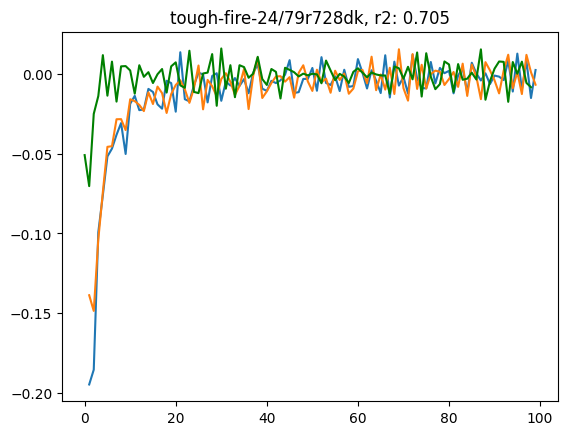

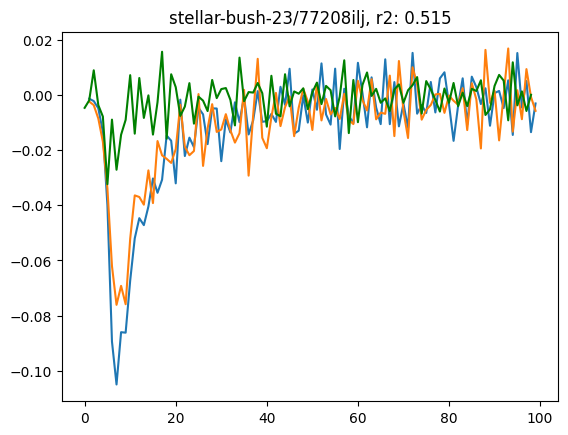

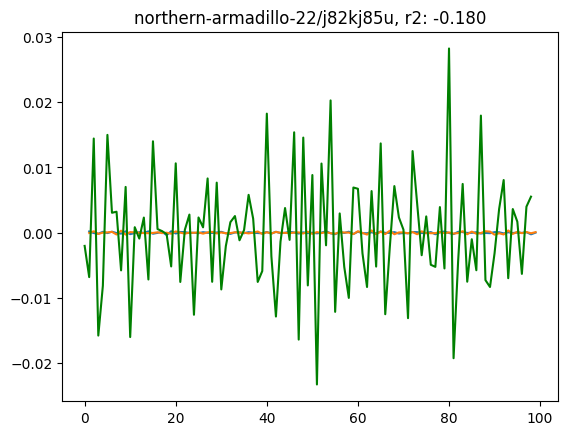

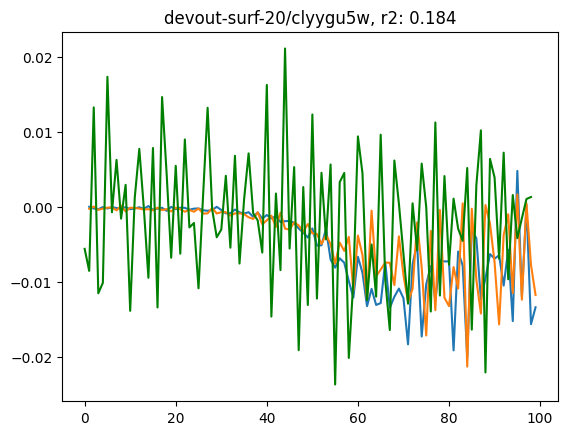

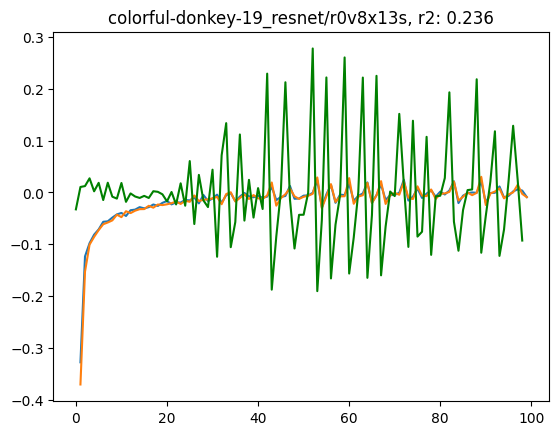

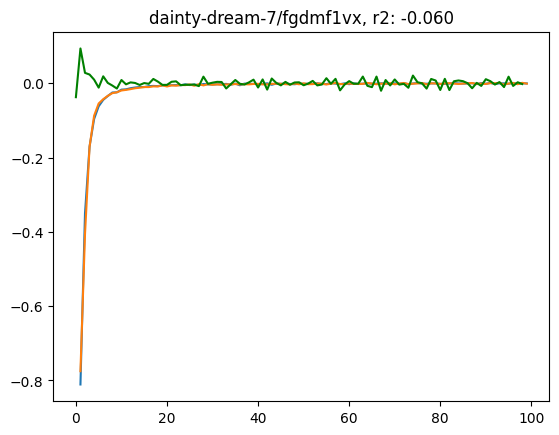

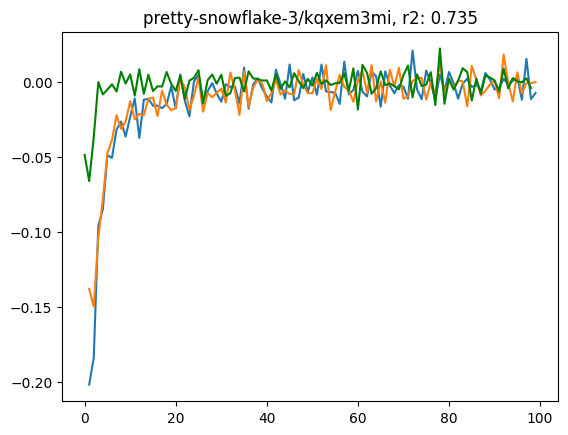

In [77]:
gradient_df = pd.DataFrame()
loss_df = pd.DataFrame()
for wandb_id in wandb_ids:
    name, run_hist, gradients = load_run(wandb_id)
    gradient_df[wandb_id] = pd.Series(gradients[:, :, 0, 1].flatten())
    loss_df[f'{wandb_id}.L'] = run_hist['losses.train.L'].dropna()
    loss_df[f'{wandb_id}.R'] = run_hist['losses.train.R'].dropna()
    # plt.plot(gradients.mean(axis=1)[:, 0, 1], 'bo')
    plt.figure()
    plt.plot(run_hist['losses.train.L'].dropna().reset_index()['losses.train.L'].diff())
    plt.plot(run_hist['losses.train.R'].dropna().reset_index()['losses.train.R'].diff())
    plt.plot(np.diff(gradients.mean(axis=1)[:, 0, 1]), 'g')
    r2 = np.corrcoef(run_hist['losses.train.L'].dropna().reset_index()['losses.train.L'].diff().iloc[1:], np.diff(gradients.mean(axis=1)[:, 0, 1]))
    plt.title(f'{name}/{wandb_id}, r2: {float(r2[0, 1]):.3f}')

/home/pasch/miniconda3/envs/libmtl/lib/python3.8/site-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


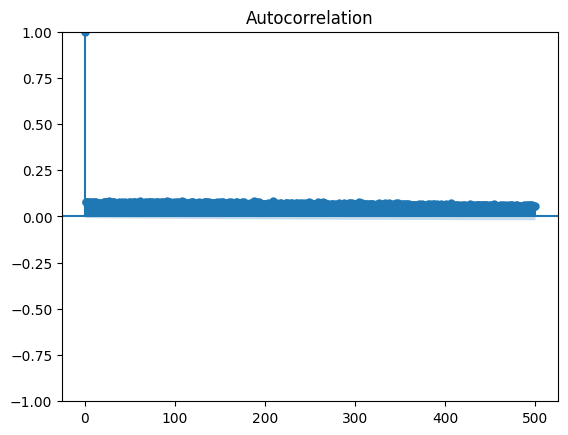

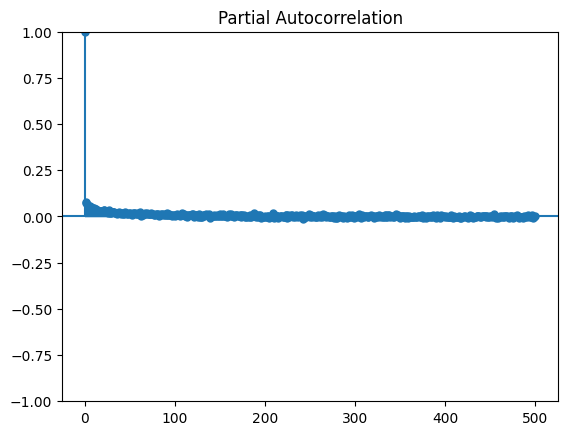

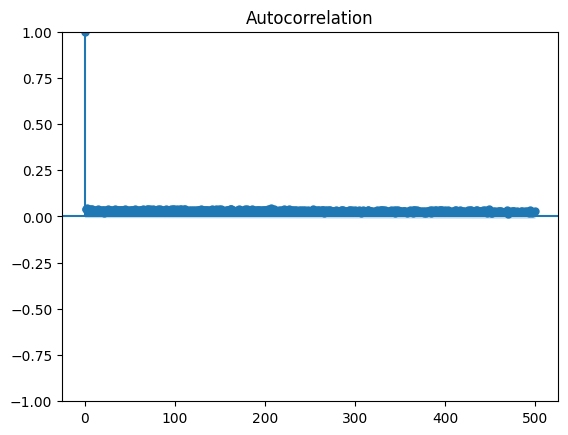

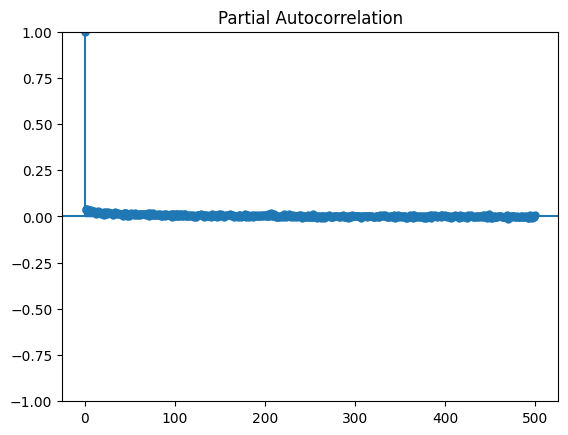

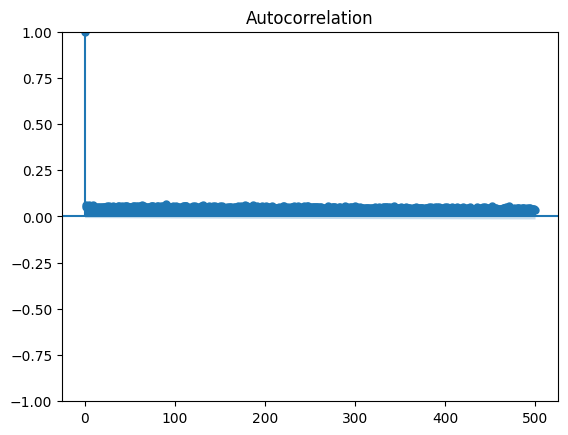

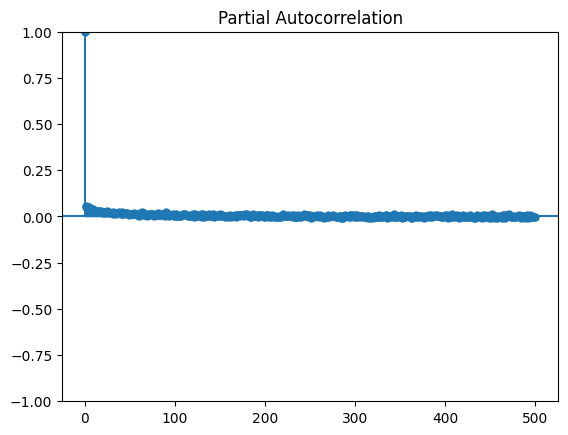

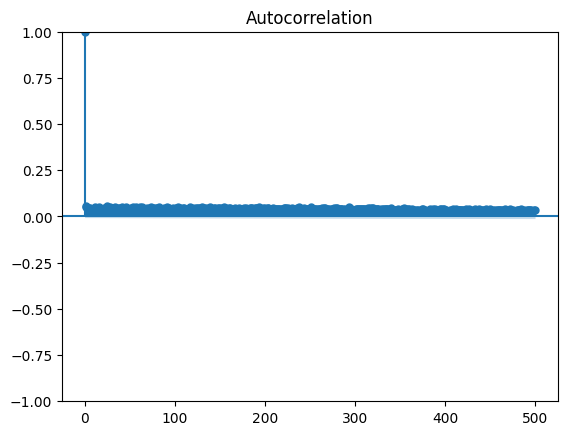

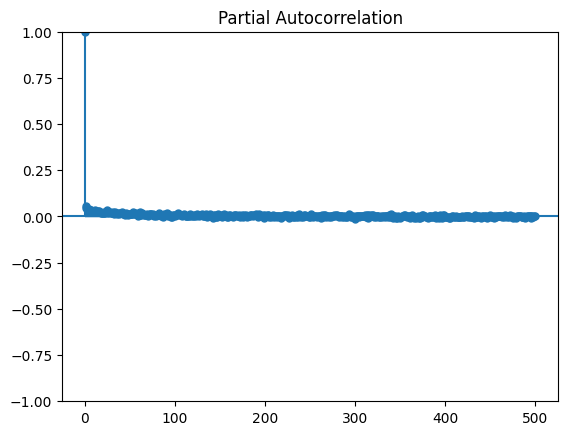

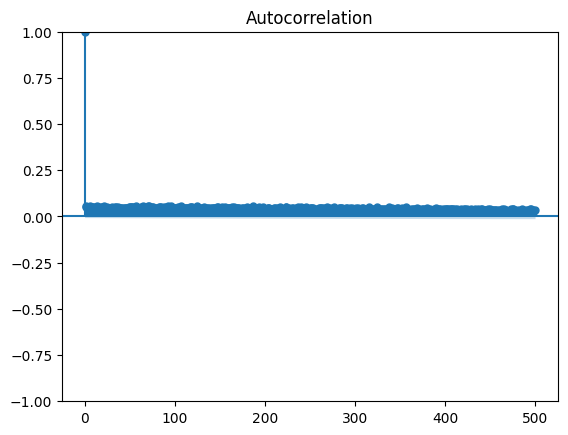

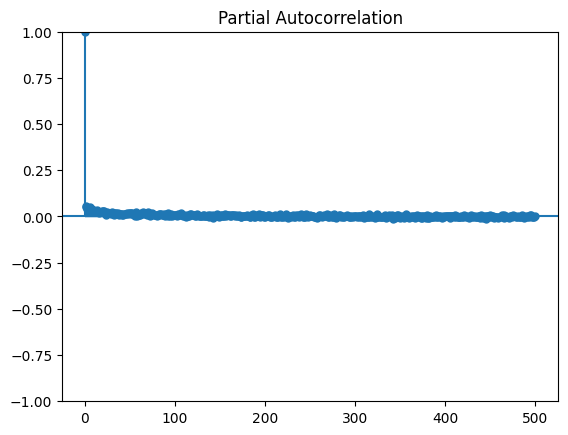

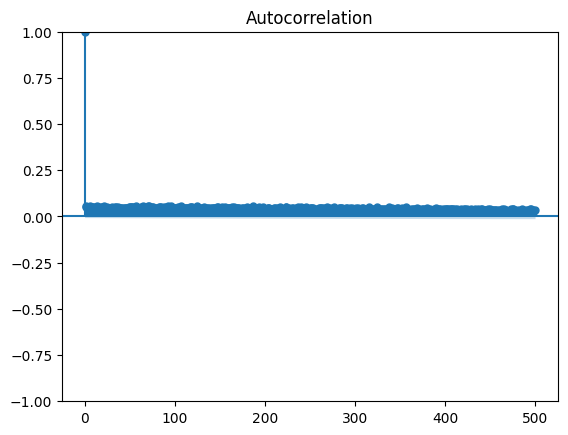

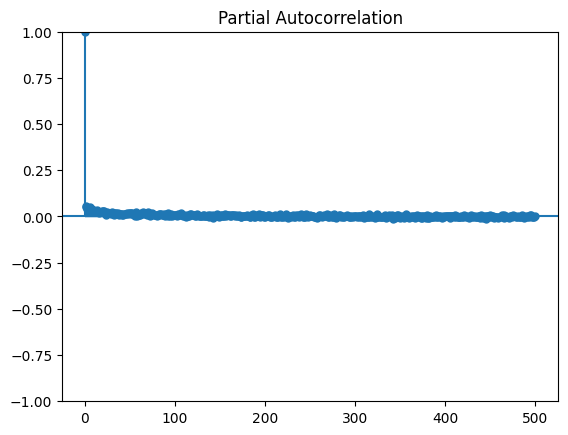

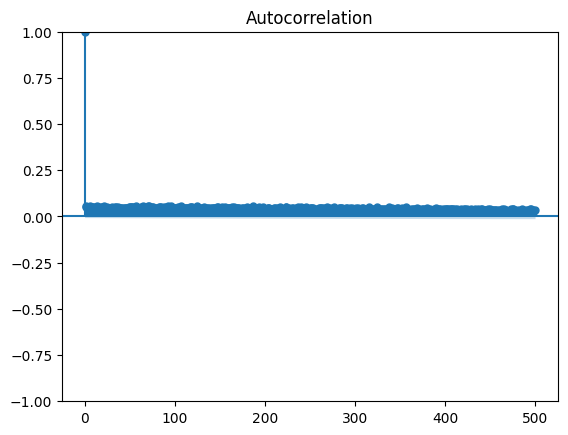

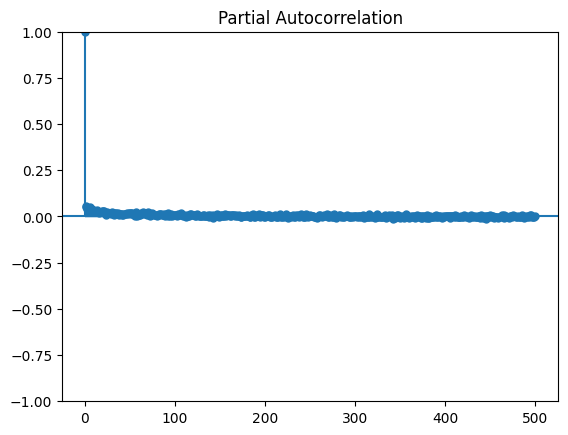

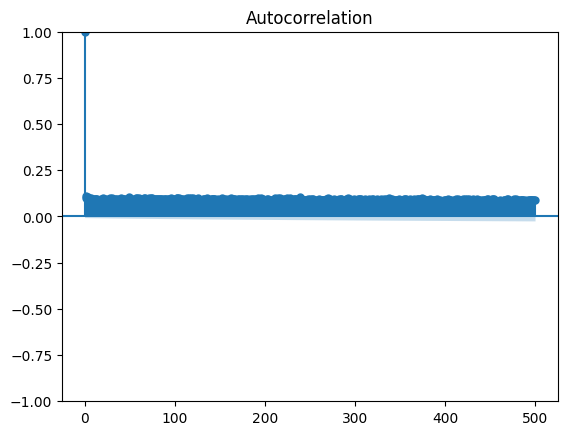

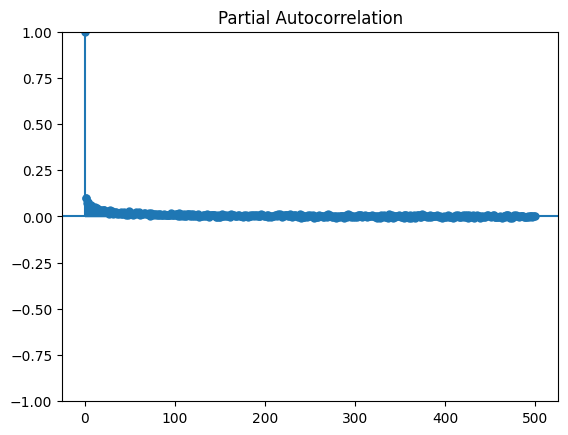

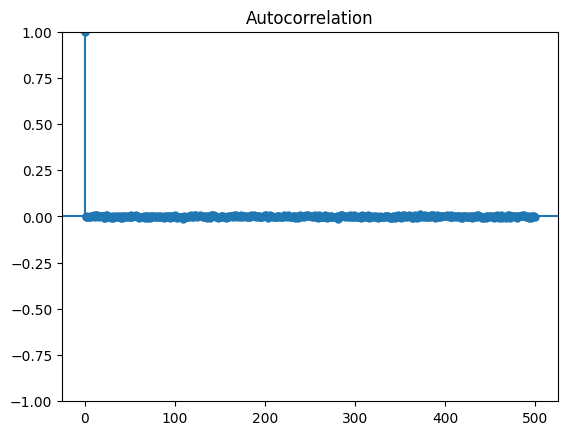

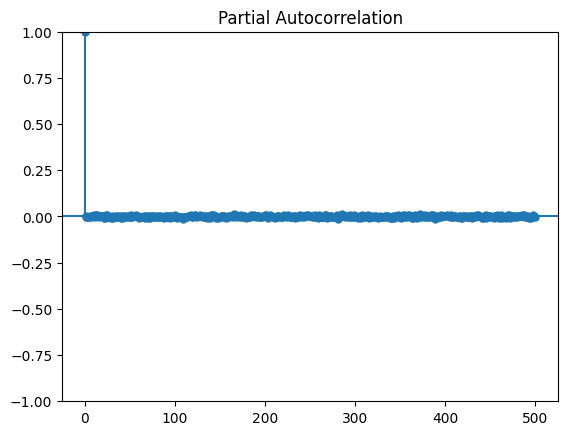

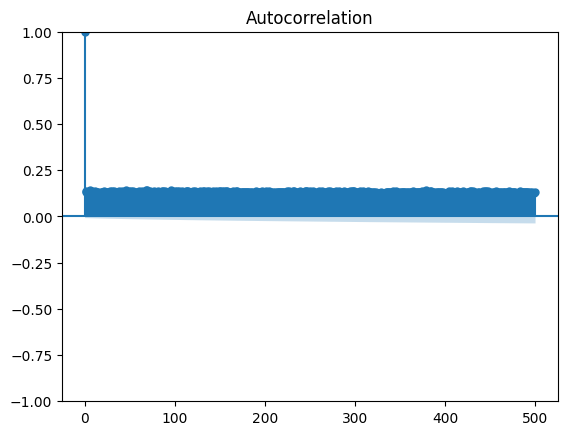

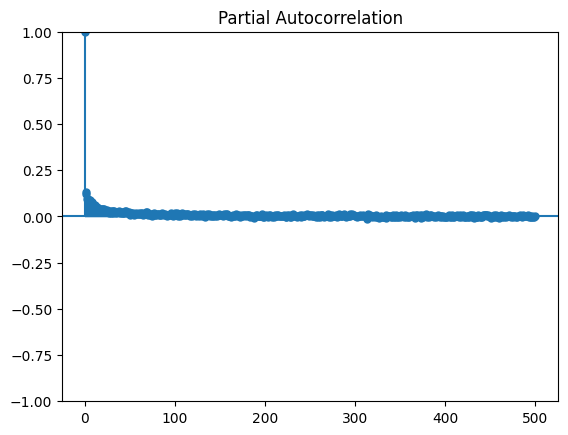

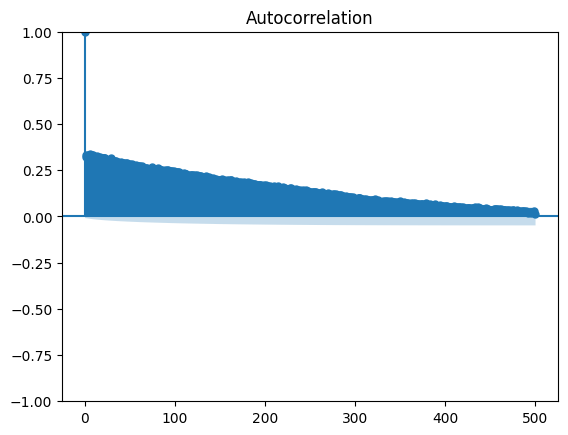

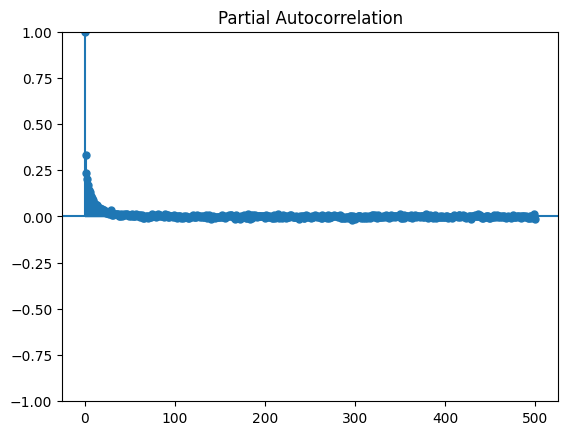

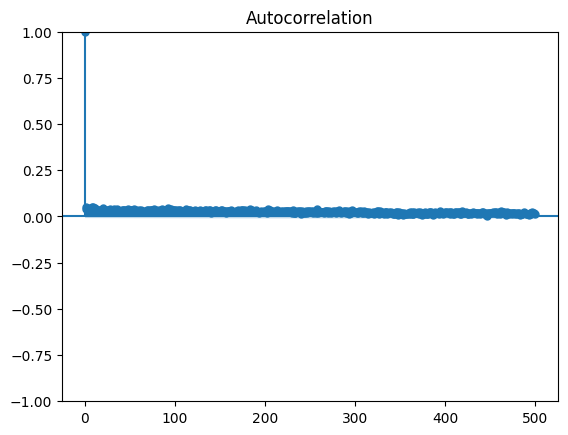

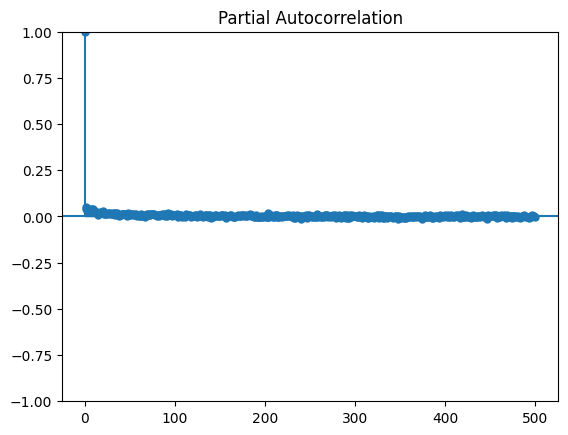

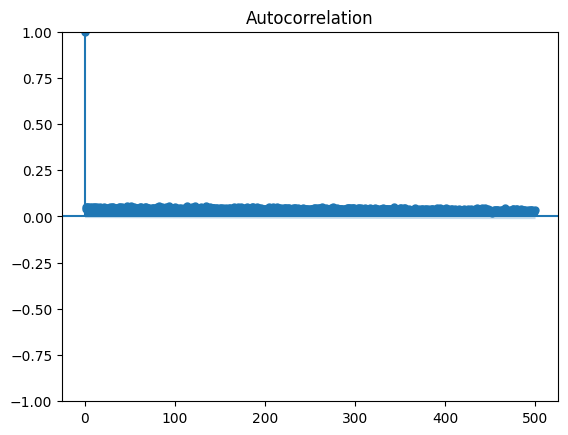

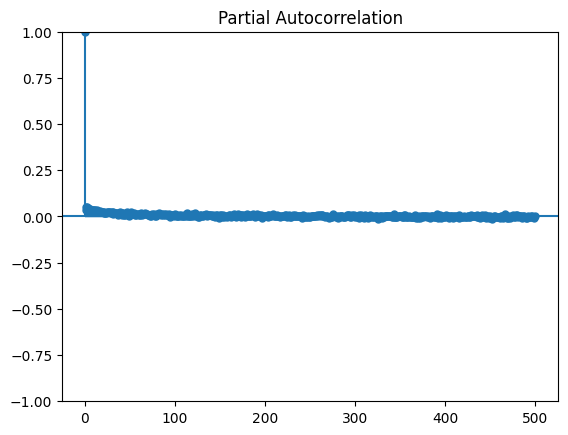

In [33]:
for wandb_id in wandb_ids:
    try:
        name, run_hist, gradients = load_run(wandb_id)
        statsmodels.graphics.tsaplots.plot_acf(pd.Series(gradients[:, :, 0, 1].flatten()).dropna().to_numpy(), lags=500)
        statsmodels.graphics.tsaplots.plot_pacf(pd.Series(gradients[:, :, 0, 1].flatten()).dropna().to_numpy(), lags=500)
    except:
        pass

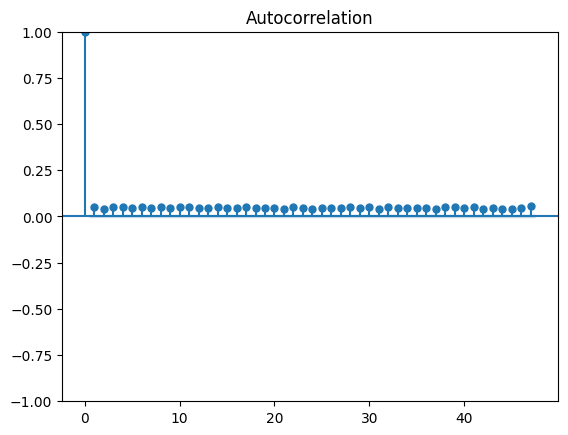

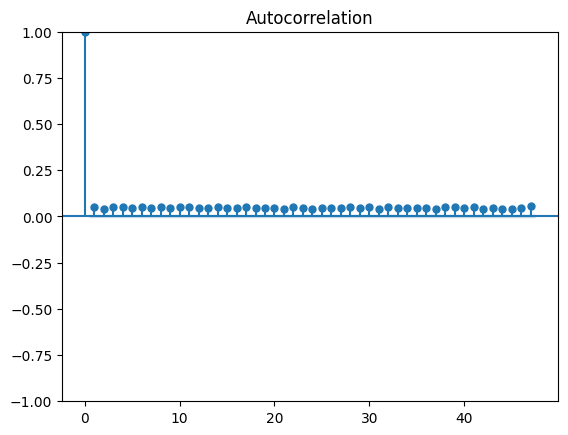

In [31]:
statsmodels.graphics.tsaplots.plot_acf(gradients[:, :, 0, 1].flatten())

# NYU runs
NYUv2 has three tasks - semantic segmentation, surface normal estimation and monocular depth estimation
We have to consider gradients
$$
C(n,r) = \begin{pmatrix}n\\ r\end{pmatrix} = \frac{n!}{(r!(n-r!))}
$$
with $n=3$ being the number of objects (tasks) and $r$ being the number of samples (2, two gradients)